# Thera Bank

## Import Libraries

In [544]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Import Dataset

In [545]:
df  = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Shape of Dataset

In [546]:
df.shape

(5000, 14)

# Dataset Info

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Missing Values

In [548]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### No missing values found

# Duplicate Rows

In [549]:
duplicate = df[df.duplicated()]
  
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


#### No Duplicate values found

# Data Summary

In [550]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Checking unique values in each column

In [551]:
#this code gives category and count for numerical
for col in df.columns:
    if df[col].dtype != 'object':
        print(f'{col} : {list(df[col].unique())} count = {df[col].nunique()} \n')

ID : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 22

# Checking Distribution of dataset

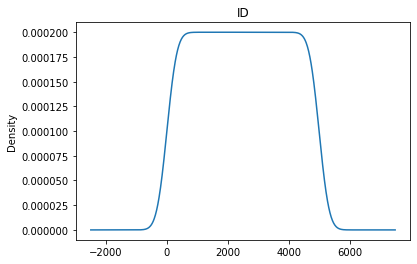

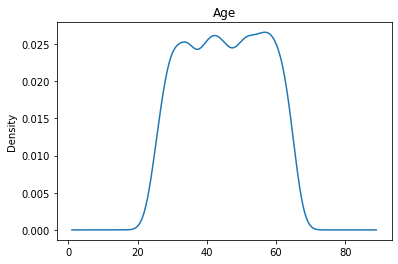

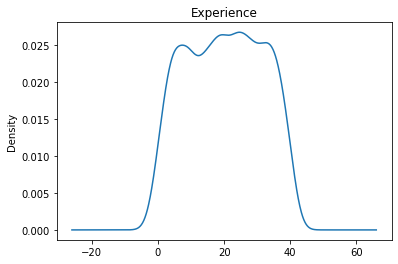

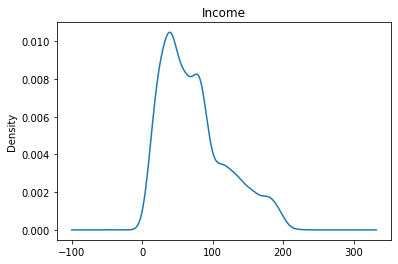

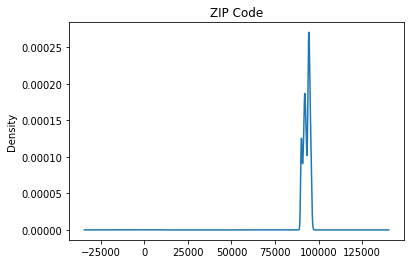

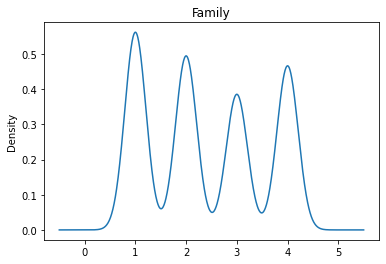

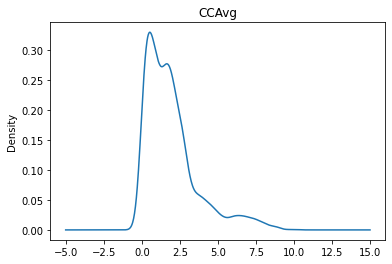

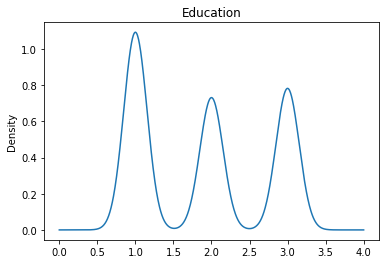

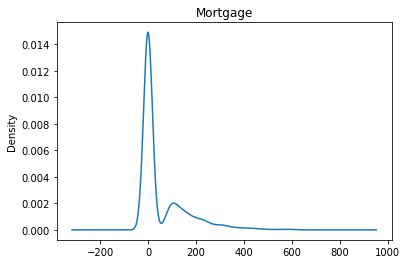

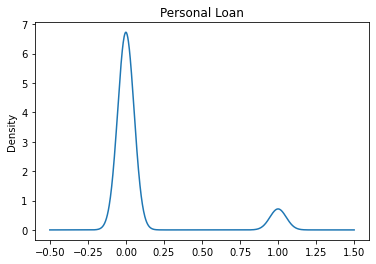

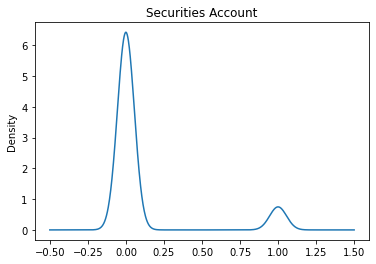

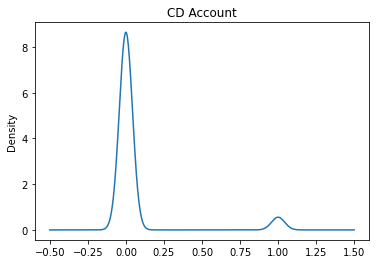

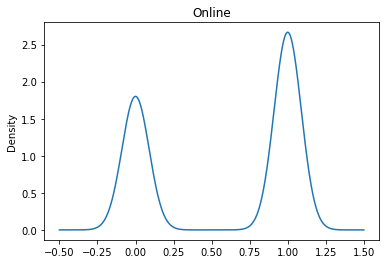

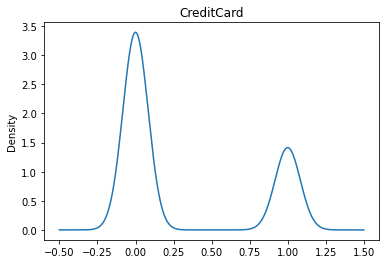

In [552]:
#this code will plot all the kde plot 

for col in df.columns:
    ax, fig = plt.subplots()
    ax = df[col].plot(kind='kde')
    ax.set_title(f'{col}')

#### 1. Age and Experience are normally distributed and both their mean and median are almost equal.

#### 2. Most of the customers are of age 30-60 years.

#### 3. Majority of customers are above 5 years of experience.

#### 4. There are negative values in experience that may be a Data error.

#### 5. CCavg and income are positively skewed

#### 6. Majority of people have mortgage less than 50k and maximum mortgage is 635k

#### 7. All other variables are evenly distributed

# Count of Experience with negative values

In [553]:
df[df['Experience'] < 0]['Experience'].count()

52

In [554]:
#replacing negative values with zero
df['Experience'] = np.where((df.Experience < 0),0,df.Experience)

In [555]:
#checking whether the values are replaced or not
df[df['Experience'] < 0]['Experience'].count()

0

# EDA

# Checking the balance of target column

Text(0.5, 1.0, 'loans repayed dataset')

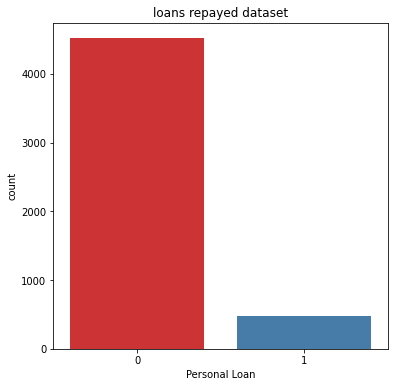

In [556]:
plt.figure(figsize = (6,6))
sns.countplot(df['Personal Loan'], palette='Set1')
plt.title('loans repayed dataset')

In [557]:
# 0 means loan not accepted 1 means loan accepted
percent = df['Personal Loan'].value_counts()/len(df['Personal Loan'])*100
percent

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

#### Data is highly imbalanced need to use SMOTE

# Checking Income VS Eduction on Personal Loan

<AxesSubplot:xlabel='Education', ylabel='Income'>

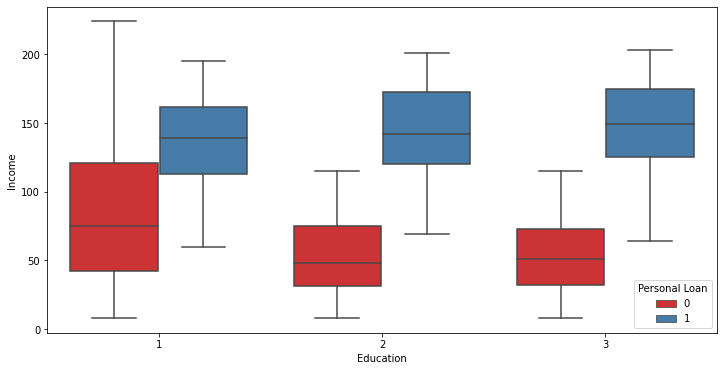

In [558]:
plt.figure(figsize = (12,6))
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df, palette='Set1')

#### 1. Customers with education level 1 is having more income.

#### 2. Customers who has taken the personal loan have the same income levels.

# Checking Education VS Mortgage on Personal Loan

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

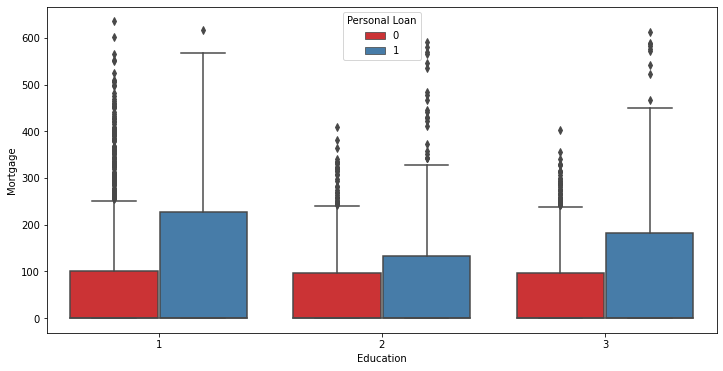

In [559]:
plt.figure(figsize = (12,6))
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df,color='orange', palette='Set1')

#### 1. Customer who do not have personal loan have high mortgage.

#### 2. Customer who has personal loan also have high mortgage

# Checking Securities Account with Personal Loan

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

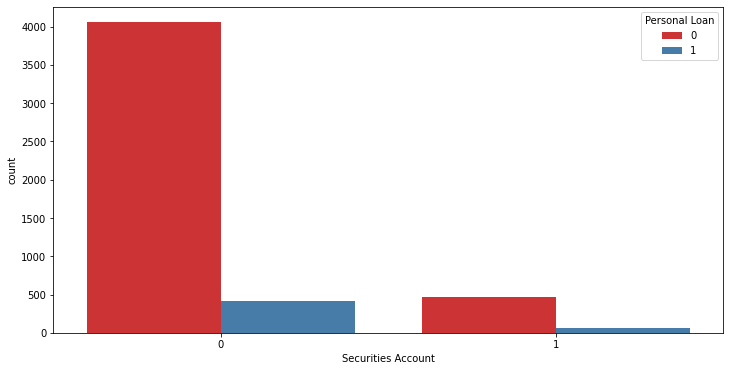

In [560]:
plt.figure(figsize = (12,6))
sns.countplot(x="Securities Account", data=df, hue="Personal Loan", palette='Set1')

#### 1. Most of the customers with no Loan have securities account 

# Family Count with Personal Loan

<AxesSubplot:xlabel='Family', ylabel='count'>

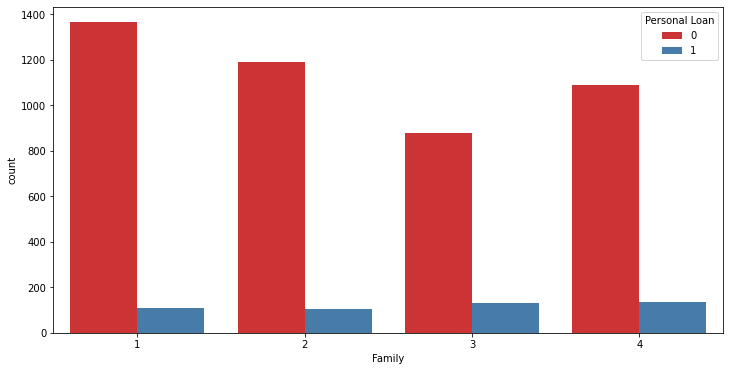

In [561]:
plt.figure(figsize = (12,6))
sns.countplot(x='Family',data=df ,hue='Personal Loan',palette='Set1')

#### 1. Families with size of 3 are more likely to take loan

# Count of CD (certificate of deposite) Account with Personal Loan

<AxesSubplot:xlabel='CD Account', ylabel='count'>

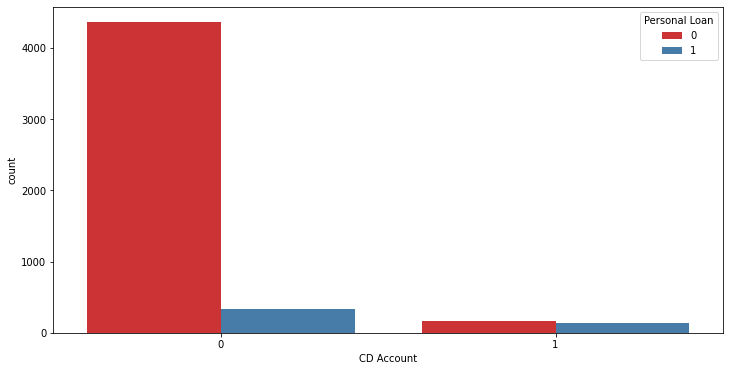

In [562]:
plt.figure(figsize = (12,6))
sns.countplot(x='CD Account',data=df ,hue='Personal Loan', palette='Set1')

#### 1. Majority of customers who do not have CD Account do not have loan

#### 2.  All the customers who has CD account has loan too.

# Distribution plot for CCAvg with Personal Loan

<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

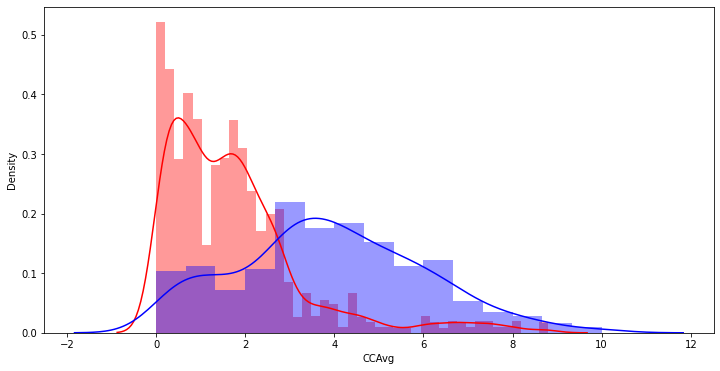

In [563]:
plt.figure(figsize = (12,6))
sns.distplot( df[df['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( df[df['Personal Loan'] == 1]['CCAvg'], color = 'b')

#### 1. Graph show customers who have personal loan have a higher credit card average.

In [564]:
print('Credit card spending of Non-Loan customers: ',df[df['Personal Loan'] == 0]['CCAvg'].median())
print('Credit card spending of Loan customers    : ', df[df['Personal Loan'] == 1]['CCAvg'].median())

Credit card spending of Non-Loan customers:  1.4
Credit card spending of Loan customers    :  3.8


#### 1. Average credit card spending with a median of 3.8 indicates a higher probability of personal loan. 

#### 2. Lower credit card spending with a median of 1.4 is less likely to take a loan.

# Scatterplot Relationship between Age and Experience with Education

Text(0, 0.5, 'Age')

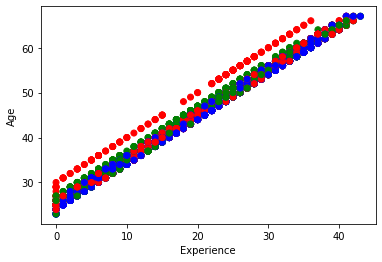

In [565]:
fig, ax = plt.subplots()
colors = {1:'blue',2:'green',3:'red'}
ax.scatter(df['Experience'],df['Age'],c=df['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

#### 1. Scatterplot shows positive correlation i.e. Experience increases with age

#### 2. Colours shows different education level

# Correlation Heatmap

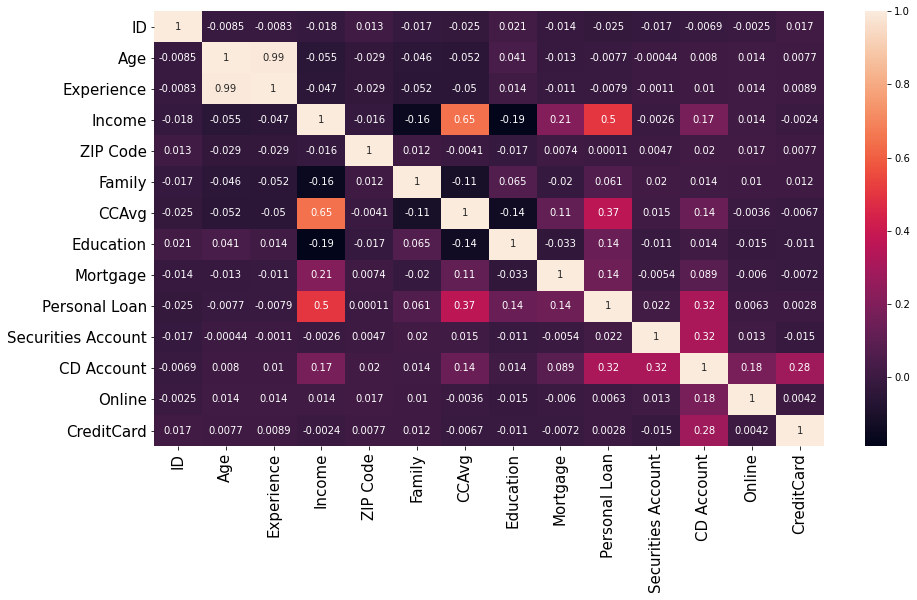

In [566]:
plt.rcParams['figure.figsize'] = (15,8)
sns.heatmap(df.corr(), annot = True, annot_kws = {"size": 10})
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(rotation = 'vertical',fontsize = 15)
plt.show()

#### 1.  Age and Experience are highly correlated

#### 2. CCavg and Income is moderately correlated.

# Dropping ID and Experience

In [567]:
df = df.drop(['ID','Experience'], axis=1)

In [568]:
df.shape

(5000, 12)

#### 1. The variable ID does not add any interesting information.

#### 2. The variable Experience is dropped to remove correlation

# Applying Neural Network

### Split data into train and test

In [587]:
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

In [570]:
target = 'Personal Loan'
X = df.loc[:, df.columns != target]
y = df.loc[:, target]

In [571]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [572]:
print(X.shape, y.shape)

(9040, 11) (9040,)


In [573]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

# Feature Scaling

In [574]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initializing our ANN model

In [575]:
classifier = Sequential()

# Adding the input layer and first hidden layer

#### In this step, we use the Dense model to add a different layer. The parameter which we pass here first is output_dim=8 which defines hidden layer=8, the second parameter is kernel_initializer='uniform' basically this is a uniform function that randomly initializes the weights which are close to 0 but not 0. The third parameter is activation= relu here in the first hidden layer we use relu activation. And the last parameter which we pass in dense function is input_dim= 11 which means the input node of our Neural Network is 11 because our dataset has 11 attributes that’s why we choose 11 input nodes.

In [576]:
classifier.add(Dense(8, kernel_initializer='uniform', activation='relu', input_dim=11))

#### Calculating the hidden layer as 2/3 of input_dim i.e. 8

# Adding the second hidden layer

In [577]:
classifier.add(Dense(8, kernel_initializer='uniform', activation='relu'))

# Adding the output layer

#### In this step, we add an output layer in our ANN structure output_dim= 1 which means one output node here we use the sigmoid function because our target attribute has a binary class which is one or zero that’s why we use sigmoid activation function.

In [578]:
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN

#### In this step, we compile the ANN to do that we use the compile method and add several parameters the first parameter is optimizer = Adam here use the optimal number of weights. So for choosing the optimal number of weights, there are various algorithms of Stochastic Gradient Descent but very efficient one which is Adam so that’s why we use Adam optimizer here. The second parameter is loss this corresponds to loss function here we use binary_crossentropy because if we see target attribute our dataset which contains the binary value that’s why we choose the binary cross-entropy. The final parameter is metrics basically It’s a list of metrics to be evaluated by the model and here we choose the accuracy metrics.

In [579]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN

#### In this step we fit the training data our model X_train, y_train is our training data. Here a batch size is basically a number of observations after which you want to update the weights here we take batch size 25. And the final parameter is epoch is basically when whole the training set passed through the ANN here we choose the 100 number of the epoch.

In [580]:
classifier.fit(X_train, y_train, batch_size= 10, epochs= 100)

Epoch 1/100
633/633 [==============================] - 5s 548us/step - loss: 0.5363 - accuracy: 0.7557
Epoch 2/100
633/633 [==============================] - 0s 530us/step - loss: 0.1980 - accuracy: 0.9237
Epoch 3/100
633/633 [==============================] - 0s 533us/step - loss: 0.1638 - accuracy: 0.9349
Epoch 4/100
633/633 [==============================] - 0s 583us/step - loss: 0.1459 - accuracy: 0.9430
Epoch 5/100
633/633 [==============================] - 0s 588us/step - loss: 0.1440 - accuracy: 0.9417
Epoch 6/100
633/633 [==============================] - 0s 593us/step - loss: 0.1410 - accuracy: 0.9456
Epoch 7/100
633/633 [==============================] - 0s 570us/step - loss: 0.1321 - accuracy: 0.9507
Epoch 8/100
633/633 [==============================] - 0s 564us/step - loss: 0.1261 - accuracy: 0.9498
Epoch 9/100
633/633 [==============================] - 0s 585us/step - loss: 0.1201 - accuracy: 0.9491
Epoch 10/100
633/633 [==============================] - 0s 588us/step - l

633/633 [==============================] - 0s 556us/step - loss: 0.1139 - accuracy: 0.9544
Epoch 80/100
633/633 [==============================] - 0s 565us/step - loss: 0.1052 - accuracy: 0.9556
Epoch 81/100
633/633 [==============================] - 0s 564us/step - loss: 0.1084 - accuracy: 0.9527
Epoch 82/100
633/633 [==============================] - 0s 556us/step - loss: 0.1085 - accuracy: 0.9528
Epoch 83/100
633/633 [==============================] - 0s 564us/step - loss: 0.1097 - accuracy: 0.9531
Epoch 84/100
633/633 [==============================] - 0s 602us/step - loss: 0.1099 - accuracy: 0.9496
Epoch 85/100
633/633 [==============================] - 0s 627us/step - loss: 0.1072 - accuracy: 0.9530
Epoch 86/100
633/633 [==============================] - 0s 564us/step - loss: 0.1152 - accuracy: 0.9536
Epoch 87/100
633/633 [==============================] - 0s 615us/step - loss: 0.1132 - accuracy: 0.9507
Epoch 88/100
633/633 [==============================] - 0s 574us/step - loss:

# Making the Prediction and Accuracy Result

#### In this step, we predict our test set result here our prediction results in probability so we choose 1(customer accepted the personal loan) if the probability is greater than one 0.5 otherwise 0(customer don’t accept the personal loan).

In [581]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

# Confusion Metric

In [582]:
from sklearn.metrics import confusion_matrix
confusion_metric = confusion_matrix(y_test, y_pred)
confusion_metric

array([[1285,   69],
       [  78, 1280]], dtype=int64)

In [583]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n')
print('True positive:', tp ,'\n')
print('False negative:', fn ,'\n')
print('False positive:', fp ,'\n')
print('True negative:', tn ,'\n')

Outcome values : 

True positive: 1280 

False negative: 78 

False positive: 69 

True negative: 1285 



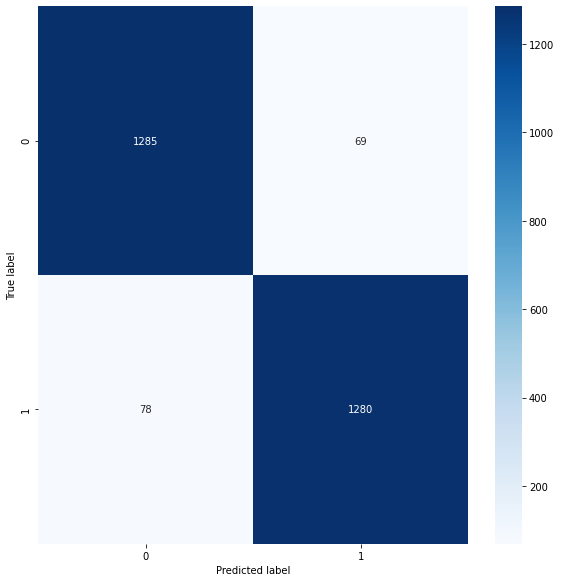

In [584]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(confusion_metric, annot=True,cmap=plt.cm.Blues,fmt='.5g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Accuracy Score

In [585]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, y_pred)
accuracy_score

0.9457964601769911

# Classification Report

In [586]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1354
           1       0.95      0.94      0.95      1358

    accuracy                           0.95      2712
   macro avg       0.95      0.95      0.95      2712
weighted avg       0.95      0.95      0.95      2712



# Conclusion

#### The intention of the thera bank is to transform there liability customers into loan customers. They want to set up a brand new marketing campaign; therefore, they need information about the relationship among the variables given inside the dataset. Artificial neural network is used in this project to get the best accuracy.